In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
λ_Re = np.log(2)/(41.2)
λ_U = np.log(2)/(4.468)
λ_Th = np.log(2)/(14.05)
λ_Rb = np.log(2)/(49.7)

In [3]:
column_titles = ['Star','log(UTh)', 'log(UTh error)','log(ThEu)', 'log(ThEu error)']
star_names = ['CS 31082-001','HE 1523−0901','HD 115444'
              ,'RAVE J203843.2–002333','CS 22892-052','BD +17 3248'
              ,'HD 221170','HD 186478','HD 108577','M92 VII-18'
              ,'BD +8 2856 ','K341 (M15)','K462 (M15)']
star_names = np.flip(star_names)
UTh = [-0.93,-0.86,-0.37,-0.9,-0.73,-0.83,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
UTh = np.flip(UTh)
ThEu = [-0.22,-0.58,-0.60,-0.49,-0.62,-0.51,-0.60
        ,-0.70,-0.51,-0.49,-0.49,-0.60,-0.66]
ThEu = np.flip(ThEu)
UTh_error = [0.11,0.12,np.nan,0.2,np.nan,0.32,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
UTh_error = np.flip(UTh_error)
ThEu_error = [0.12,0.05,0.13,0.05,0.10,0.11,0.05,0.11,0.14,0.1,0.09,0.13,0.13]
ThEu_error = np.flip(ThEu_error)
data={'Star':star_names,'log(UTh)':UTh,'log(UTh error)':UTh_error,'log(ThEu)':ThEu,'log(ThEu error)':ThEu_error}
df = pd.DataFrame(data,columns=column_titles)
df

,Star,log(UTh),log(UTh error),log(ThEu),log(ThEu error)
0,K462 (M15),NaN,NaN,-0.66,0.13
1,K341 (M15),NaN,NaN,-0.60,0.13
2,BD +8 2856,NaN,NaN,-0.49,0.09
3,M92 VII-18,NaN,NaN,-0.49,0.10
4,HD 108577,NaN,NaN,-0.51,0.14
5,HD 186478,NaN,NaN,-0.70,0.11
6,HD 221170,NaN,NaN,-0.60,0.05
7,BD +17 3248,-0.83,0.32,-0.51,0.11
8,CS 22892-052,-0.73,NaN,-0.62,0.10
9,RAVE J203843.2–002333,-0.90,0.20,-0.49,0.05


In [4]:
UTh_prod_ratio = np.linspace(0.4,0.7,1000)
ThEu_prod_ratio = np.linspace(10**(-0.32),10**(-0.26),1000)
UTh_const = np.log(10)/(λ_U-λ_Th) # ~21.8
ThEu_const = np.log(10)/(λ_Th) # ~46.7


ageUTh    = []
ageThEu = []
#Looping through the ages U/Th production ratios and calculating the age for each star 
for i in range(len(df)):
    ageUTh.append(UTh_const*(np.log10(UTh_prod_ratio)-df['log(UTh)'][i]))
    
#Looping through the ages Th/Eu production ratios and calculating the age for each star 
for i in range(len(df)):
    ageThEu.append(ThEu_const*(np.log10(ThEu_prod_ratio)-df['log(ThEu)'][i])) 

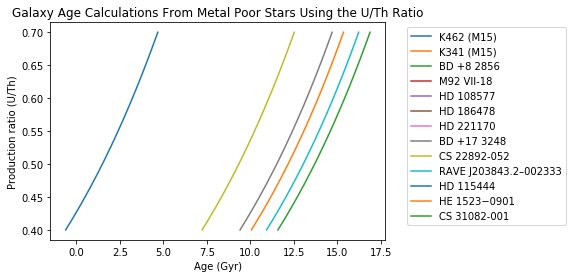

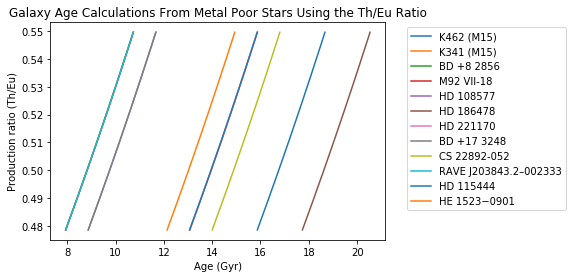

In [5]:
#Plotting the UTh age calculations
fig1, ax1 = plt.subplots()
for i in range(len(df)):
    #if not np.isnan(df['log(UTh)'][i]) and df['Star'][i] != 'HD 115444':
     ax1.plot(ageUTh[i],UTh_prod_ratio,label=df['Star'][i])
ax1.set_xlabel('Age (Gyr)')
ax1.set_ylabel('Production ratio (U/Th)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Galaxy Age Calculations From Metal Poor Stars Using the U/Th Ratio')
plt.show()

#Plotting the ThEu age calculations
fig2, ax2 = plt.subplots()
for i in range(len(df)):
    if not np.isnan(df['log(ThEu)'][i]) and df['Star'][i] != 'CS 31082-001':
         ax2.plot(ageThEu[i],ThEu_prod_ratio,label=df['Star'][i])
ax2.set_xlabel('Age (Gyr)')
ax2.set_ylabel('Production ratio (Th/Eu)')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Galaxy Age Calculations From Metal Poor Stars Using the Th/Eu Ratio')
plt.show()

Age of BD +17 3248           is 11.82 with boundaries -0.356 and 22.475
Age of CS 22892-052          is 9.64 with boundaries nan and nan
Age of RAVE J203843.2–002333 is 13.34 with boundaries 3.779 and 21.387
Age of HD 115444             is 1.81 with boundaries nan and nan
Age of HE 1523−0901          is 12.47 with boundaries 4.649 and 18.776
Age of CS 31082-001          is 14.00 with boundaries 6.390 and 20.081


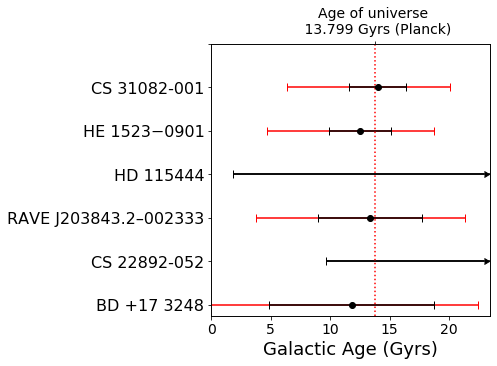

In [6]:
UTh_prod_ratio_upper = 0.76335
UTh_prod_ratio_lower = 0.2976
UTh_prod_ratio_mean  = 0.5166


#print(np.array(df['Star'][:7]))

#UTH Age calculations
fig,ax = plt.subplots(figsize=(5,5))
for i in range(6):
    i = i + 7
    UTh_upper = UTh_const*(np.log10(UTh_prod_ratio_upper)-(df['log(UTh)'][i]-df['log(UTh error)'][i]))
    UTh_lower = UTh_const*(np.log10(UTh_prod_ratio_lower)-(df['log(UTh)'][i]+df['log(UTh error)'][i]))
    UTh_mean  = UTh_const*(np.log10(UTh_prod_ratio_mean) -(df['log(UTh)'][i]))
    print('Age of {:21s} is {:.2f} with boundaries {:2.3f} and {:2.3f}'.format(df['Star'][i],UTh_mean,UTh_lower,UTh_upper))

    if df['Star'][i]=='CS 22892-052':
        ax.errorbar(UTh_mean,i-7,xerr=UTh_mean+3.7,lolims=True,xlolims=True,fmt='',color='k')
        ax.errorbar(UTh_mean,i-7,xerr=[[0],[23.5]],color='k',capsize=4,fmt='')
    elif df['Star'][i]=='HD 115444':
        ax.errorbar(UTh_mean,i-7,xerr=23.5-0.55-UTh_mean,lolims=True,xlolims=True,fmt='',color='k')
        ax.errorbar(UTh_mean,i-7,xerr=[[0],[23.5]],color='k',capsize=4)
    else:       
        ax.errorbar(UTh_mean,i-7, xerr=[[UTh_mean-UTh_lower],[UTh_upper-UTh_mean]], fmt='',color='r',capsize=4)
        #Plotting the error but not including the uncertainty in the production ratio
        UTh_upper = UTh_const*(np.log10(UTh_prod_ratio_mean)-(df['log(UTh)'][i]-df['log(UTh error)'][i]))
        UTh_lower = UTh_const*(np.log10(UTh_prod_ratio_mean)-(df['log(UTh)'][i]+df['log(UTh error)'][i]))
        UTh_mean  = UTh_const*(np.log10(UTh_prod_ratio_mean) -(df['log(UTh)'][i]))
        errorbar  = [[UTh_upper],[UTh_lower]]
        ax.errorbar(UTh_mean,i-7, xerr=[[UTh_upper-UTh_mean],[UTh_mean-UTh_lower]], fmt='o',color='k',capsize=4)
        
ax.set_xlim(0,23.5)
ax.set_xticklabels(labels=[0,5,10,15,20],fontsize=14)
ax.set_yticks(np.arange(0,7,1))
ax.set_yticklabels(star_names[7:],fontsize=16)
ax.set_xlabel('Galactic Age (Gyrs)', fontsize=18)
ax.axvline(13.799,0,1,color='r',linestyle=':',alpha=1)

ax2 = ax.twiny()
ax2.set_xticks([13.799/23.5])
ax2.set_xticklabels(["Age of universe \n 13.799 Gyrs (Planck)"],fontsize=14)
plt.show()

Age of K462 (M15)            is 16.34 with boundaries 10.277 and 22.412, +/- : 6.068
Age of K341 (M15)            is 13.54 with boundaries 7.477 and 19.612, +/- : 6.068
Age of BD +8 2856            is 8.41 with boundaries 4.210 and 12.611, +/- : 4.201
Age of M92 VII-18            is 8.41 with boundaries 3.743 and 13.078, +/- : 4.667
Age of HD 108577             is 9.34 with boundaries 2.810 and 15.878, +/- : 6.534
Age of HD 186478             is 18.21 with boundaries 13.078 and 23.346, +/- : 5.134
Age of HD 221170             is 13.54 with boundaries 11.211 and 15.878, +/- : 2.334
Age of BD +17 3248           is 9.34 with boundaries 4.210 and 14.478, +/- : 5.134
Age of CS 22892-052          is 14.48 with boundaries 9.811 and 19.145, +/- : 4.667
Age of RAVE J203843.2–002333 is 8.41 with boundaries 6.077 and 10.744, +/- : 2.334
Age of HD 115444             is 13.54 with boundaries 7.477 and 19.612, +/- : 6.068
Age of HE 1523−0901          is 12.61 with boundaries 10.277 and 14.945, +/- :

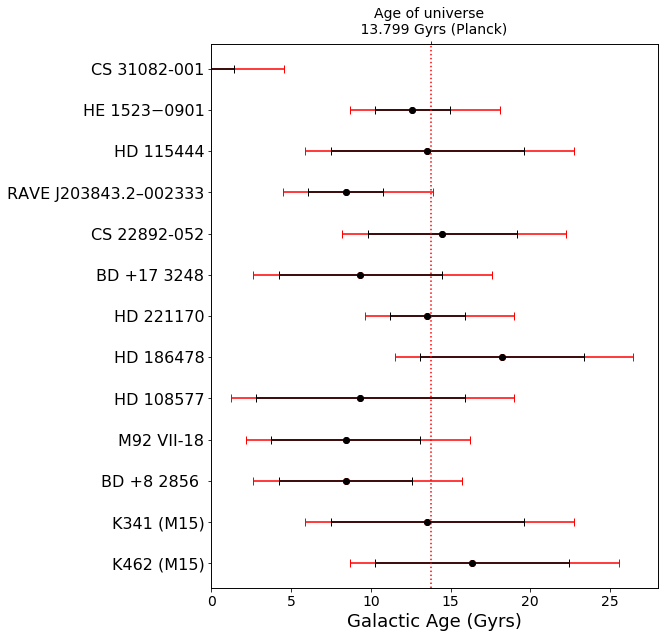

In [7]:
ThEu_prod_ratio_upper = 0.53
ThEu_prod_ratio_lower = 0.42
ThEu_prod_ratio_mean  = 0.49
#These values are chosen because they agree with all the 
#found values from other work saved however unlike the other
#work it provides an uncertainty in the value.
age = []
uncert_lo = []
uncert_hi = []
#EUThAge calculations
fig,ax = plt.subplots(figsize=(8,10))
for i in range(len(df)):
    ThEu_upper = ThEu_const*(np.log10(ThEu_prod_ratio_upper)-(df['log(ThEu)'][i]-df['log(ThEu error)'][i]))
    ThEu_lower = ThEu_const*(np.log10(ThEu_prod_ratio_lower)-(df['log(ThEu)'][i]+df['log(ThEu error)'][i]))
    ThEu_mean  = ThEu_const*(np.log10(ThEu_prod_ratio_mean) -(df['log(ThEu)'][i]))      
        
    errorbar  = [[ThEu_upper],[ThEu_lower]]
    ax.errorbar(ThEu_mean,i, xerr=[[ThEu_upper-ThEu_mean],[ThEu_mean-ThEu_lower]], fmt=':o',color='r',capsize=4)
        
    #Plotting the error but not including the uncertainty in the production ratio
    ThEu_upper = ThEu_const*(np.log10(ThEu_prod_ratio_mean)-(df['log(ThEu)'][i]-df['log(ThEu error)'][i]))
    ThEu_lower = ThEu_const*(np.log10(ThEu_prod_ratio_mean)-(df['log(ThEu)'][i]+df['log(ThEu error)'][i]))
    ThEu_mean  = ThEu_const*(np.log10(ThEu_prod_ratio_mean) -(df['log(ThEu)'][i]))
    errorbar  = [[ThEu_upper],[ThEu_lower]]
    ax.errorbar(ThEu_mean,i, xerr=[[ThEu_upper-ThEu_mean],[ThEu_mean-ThEu_lower]], fmt='o',color='k',capsize=4)
        
    print('Age of {:21s} is {:.2f} with boundaries {:2.3f} and {:2.3f}, +/- : {:2.3f}'.format(df['Star'][i],ThEu_mean,ThEu_lower,ThEu_upper,(ThEu_upper-ThEu_lower)/2))
    age.append(ThEu_mean)
    uncert_lo.append(ThEu_lower)
    uncert_hi.append(ThEu_upper)
ax.set_xlim(0,28)
ax.set_xticklabels([0,5,10,15,20,25],fontsize=14)
ax.set_yticks(np.arange(0, len(df), 1.0))
star_names = np.array(df['Star'])
ax.set_yticklabels(star_names,fontsize=16)
ax.set_xlabel('Galactic Age (Gyrs)', fontsize=18)
ax.axvline(13.799,0,1,color='r',linestyle=':',alpha=1)

ax2 = ax.twiny()
ax2.set_xticks([13.799/28])
ax2.set_xticklabels(["Age of universe \n 13.799 Gyrs (Planck)"],fontsize=14)
plt.show()

In [8]:
print(star_names)

['K462 (M15)' 'K341 (M15)' 'BD +8 2856 ' 'M92 VII-18' 'HD 108577'
 'HD 186478' 'HD 221170' 'BD +17 3248' 'CS 22892-052'
 'RAVE J203843.2–002333' 'HD 115444' 'HE 1523−0901' 'CS 31082-001']


In [9]:
#Values taken from https://www.aanda.org/articles/aa/pdf/2001/45/aah3066.pdf
a = [2.05,
    2.30,
    2.05,
    1.97,
    #3.36,
    1.56,
    2.03,
    1.89,
    1.90,
    2.34,
    1.31,
    1.83,
    2.05,
    1.56,
    1.37,
    1.95,
    2.53,
    2.82,
    2.43,
    1.84,
    2.76,
    2.09,
    2.53,
    1.61,
    1.02,
    #2.96,
    1.55,
    2.24,
    1.69,
    2.04,
    1.68,
    2.71
    ]

b = []
for i in range(len(a)):
    b.append(1/a[i])

print(np.mean(b))
print(np.std(b))
std_dev = np.std(b)

0.5298653658830499
0.13235541150133207
